In [21]:
# ~ 最初に唱えるおまじない ~ 
#  packagesのimport
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
% matplotlib inline

In [22]:
# 色々計算してくれる関数達
# 講義で学んだ内容と比較してみよう！

def calc(nw,a,m,type=1): 
    '''
    calc(calc,a,m,type=1)
    ネットワークnwにm本のlinkを持つnodeを1個追加する関数
    
    parameters
    --------
    nw : list
      隣接リスト:[(node1に繋がっているnodeからなるlist), (node2に繋がっているnodeからなるlist),...]
    a : real
      枝をつけ加える確率に対するbias
    m : int
      新たに追加されるnodeが持っているedgeの個数
    type : int
      type = 1 -> 重み付け確率
      type = 2 -> 一様確率
    '''
    
    N=len(nw) # node数
    degrees = np.array([len(n) for n in nw]) # 各nodeの次数
    K=degrees.sum()  # (biasも考慮に入れた)linkの本数(重複あり)
    
    #重み付け確率を決める
    if type==1:
        plist = (degrees + a) / (float(K) + N*a)
    elif type ==2:
        plist = np.ones(N) / N
    else:
        print("Error! : type",type,"undefined!")
        raise ValueError 
    
    #linkを追加するnodeのindex番号を決める
    index=choice(range(0,N),m,replace=False,p=plist)
    
    #ネットワークに新しいnodeを1個追加する
    for i in index:
        nw[i].append(N)
    nw.append(sorted(list(index)))
    
def dist(nw): 
    '''
    dist(nw)
    ネットワーク配列nwから次数分布の配列を作る関数
        
    parameter
    --------
    nw : list
      隣接リスト:[(node1に繋がっているnodeからなるlist), (node2に繋がっているnodeからなるlist),...]
    '''
    degrees = [len(n) for n in nw] # 各nodeの次数
    
    x = np.arange(m,Nmax,dtype=np.int64) # x軸：次数
    y = np.array([degrees.count(degree) for degree in x]) # y軸：頻度
    y=y/y.sum() # 規格化

    y2=theofunc(m,a,x)
    
    np.save("x.npy",x) # x.npyには次数の列が入っている
    np.save("y.npy",y) # y.npyには数値シミュレーションした各次数の頻度が入っている
    np.save("y2.npy",y2) # y2.npyには理論値の各次数の頻度が入っている

def comgra(m): #
    '''
    comgra(m)
    次数mの完全グラフを作る関数
    
    parameter
    --------
    m : int
      完全グラフの次数
    '''
    nw=[[j for j in range(m) if i != j ] for i in range(m)]
    return nw

In [23]:
# 理論値：自分で計算した結果をプログラムにしてみよう！
def theofunc(m,a,x):
    '''
    theofunc(m,a,x)
    次数分布の理論値
    
    parameters
    --------
    m : int 
      新たに付け加わるnodeが持つ枝の本数
    a : real
      重み確率に対するbias
    x : int or real
      次数
    '''
    func=2.*m*(m+1)/(x*x*x)    # <======== 手で計算した理論値の関数を入れてみよう！
    return func

In [24]:
%%time

#########################################
#シミュレーションの設定(次数mの完全グラフを初期状態にとる)
#########################################

# パラメータ　： ここを変えてみて結果がどう変わるか見てみよう！
m=4 # 追加するnodeの持つlinkの本数 
Nmax=10000 # 追加するnodeの個数
a=0. # 重み付け確率を計算する時のパラメータ

# 初期状態を生成する
# node数mの完全グラフを作成
nw=comgra(m)

#################
#ネットワークを成長させる
#################
# Nmax回m本の枝を持つnodeを追加する
for j in range(0,Nmax):
    # 関数calcでネットワークnwにnodeを追加していく
    # 3個目の引数(重み付け確率でシミュレーション:type=1,一様確率でシミュレーション:type=2)
    calc(nw,a,m,type=1) # typeの値を変えてみよう！

np.save("nwdata.npy",nw)

############
#分布を計算する
############
dist(nw)
# x.npyには次数の列が入っている
# y.npyには数値シミュレーションした各次数の頻度が入っている
# y2.npyには理論値の各次数の頻度が入っている
flag=["scalefree"]
np.save("flag.npy",flag)

CPU times: user 24.9 s, sys: 62.4 ms, total: 24.9 s
Wall time: 25 s


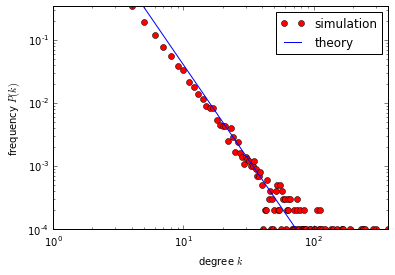

In [30]:
###############
#分布をplotしてみよう！
###############

# シミュレーション結果
x= np.load("x.npy")# x.npyには次数の列が入っている
y= np.load("y.npy")# y.npyには数値シミュレーションした各次数の頻度が入っている
plt.plot(x,y,"ro",label="simulation") # シミュレーション結果のplot

# 理論値 (表示したくない場合は行頭に#を付ければ無視されます...´･_･`)
y2=np.load("y2.npy")# y2.npyには理論値の各次数の頻度が入っている
plt.plot(x,y2,"b-",label="theory")

# 表示に関するオプション
plt.xlabel(r"degree $k$")
plt.ylabel(r"frequency $P(k)$")
plt.xlim([1,x[y>0].max()]) # x軸の表示範囲 (1から最大次数まで)
plt.ylim([1/Nmax,y.max()]) # y軸の表示範囲
plt.xscale("log")
plt.yscale("log")
plt.legend()

plt.show() # 表示！！

In [26]:
print("Python 楽しい!!")

Python 楽しい!!
